In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg


In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


### Group one seperation

In [3]:
group_one = dataset[dataset["Diagnosis"] == 0]
group_two = dataset[dataset["Diagnosis"] == 3]

combined_group_one = pd.concat([group_one, group_two], ignore_index = True)
combined_group_one["Diagnosis"].unique()

array([0, 3])

In [4]:
combined_group_one

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
1,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
2,14,1,78.6137,0,29.0,0.12,188.33,0.49,183.76,39.63,...,241.64,0.44,226.48,35.11,664.29,3.10,8478.33,3.01,1809.0,3292.0
3,15,0,80.9068,0,29.0,0.10,161.28,0.54,174.53,35.94,...,221.76,0.45,NaN,30.57,NaN,3.12,4287.78,2.90,2188.0,3603.0
4,16,0,65.5205,0,28.0,0.12,166.97,0.58,202.96,38.42,...,228.53,0.50,228.72,28.98,686.36,2.90,-1381.99,2.73,1829.0,3695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1201,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
320,1221,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
321,1248,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
322,1253,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


In [5]:
y_split_one = combined_group_one["Diagnosis"]
y_split_one.value_counts()

Diagnosis
0    194
3    130
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

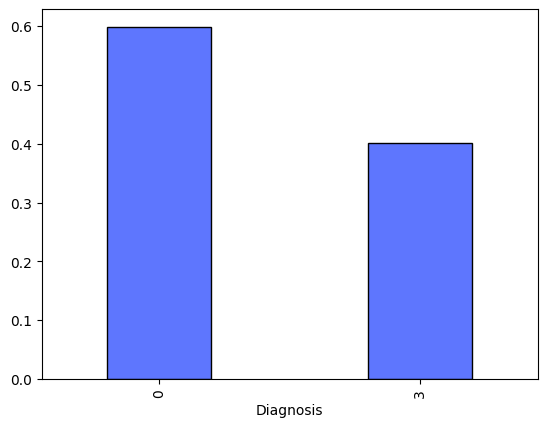

In [6]:
y_split_one.value_counts(normalize=True).plot(kind="bar",
                                                color = "#5e76fe",
                                                width = 0.4,
                                                edgecolor = "black",)

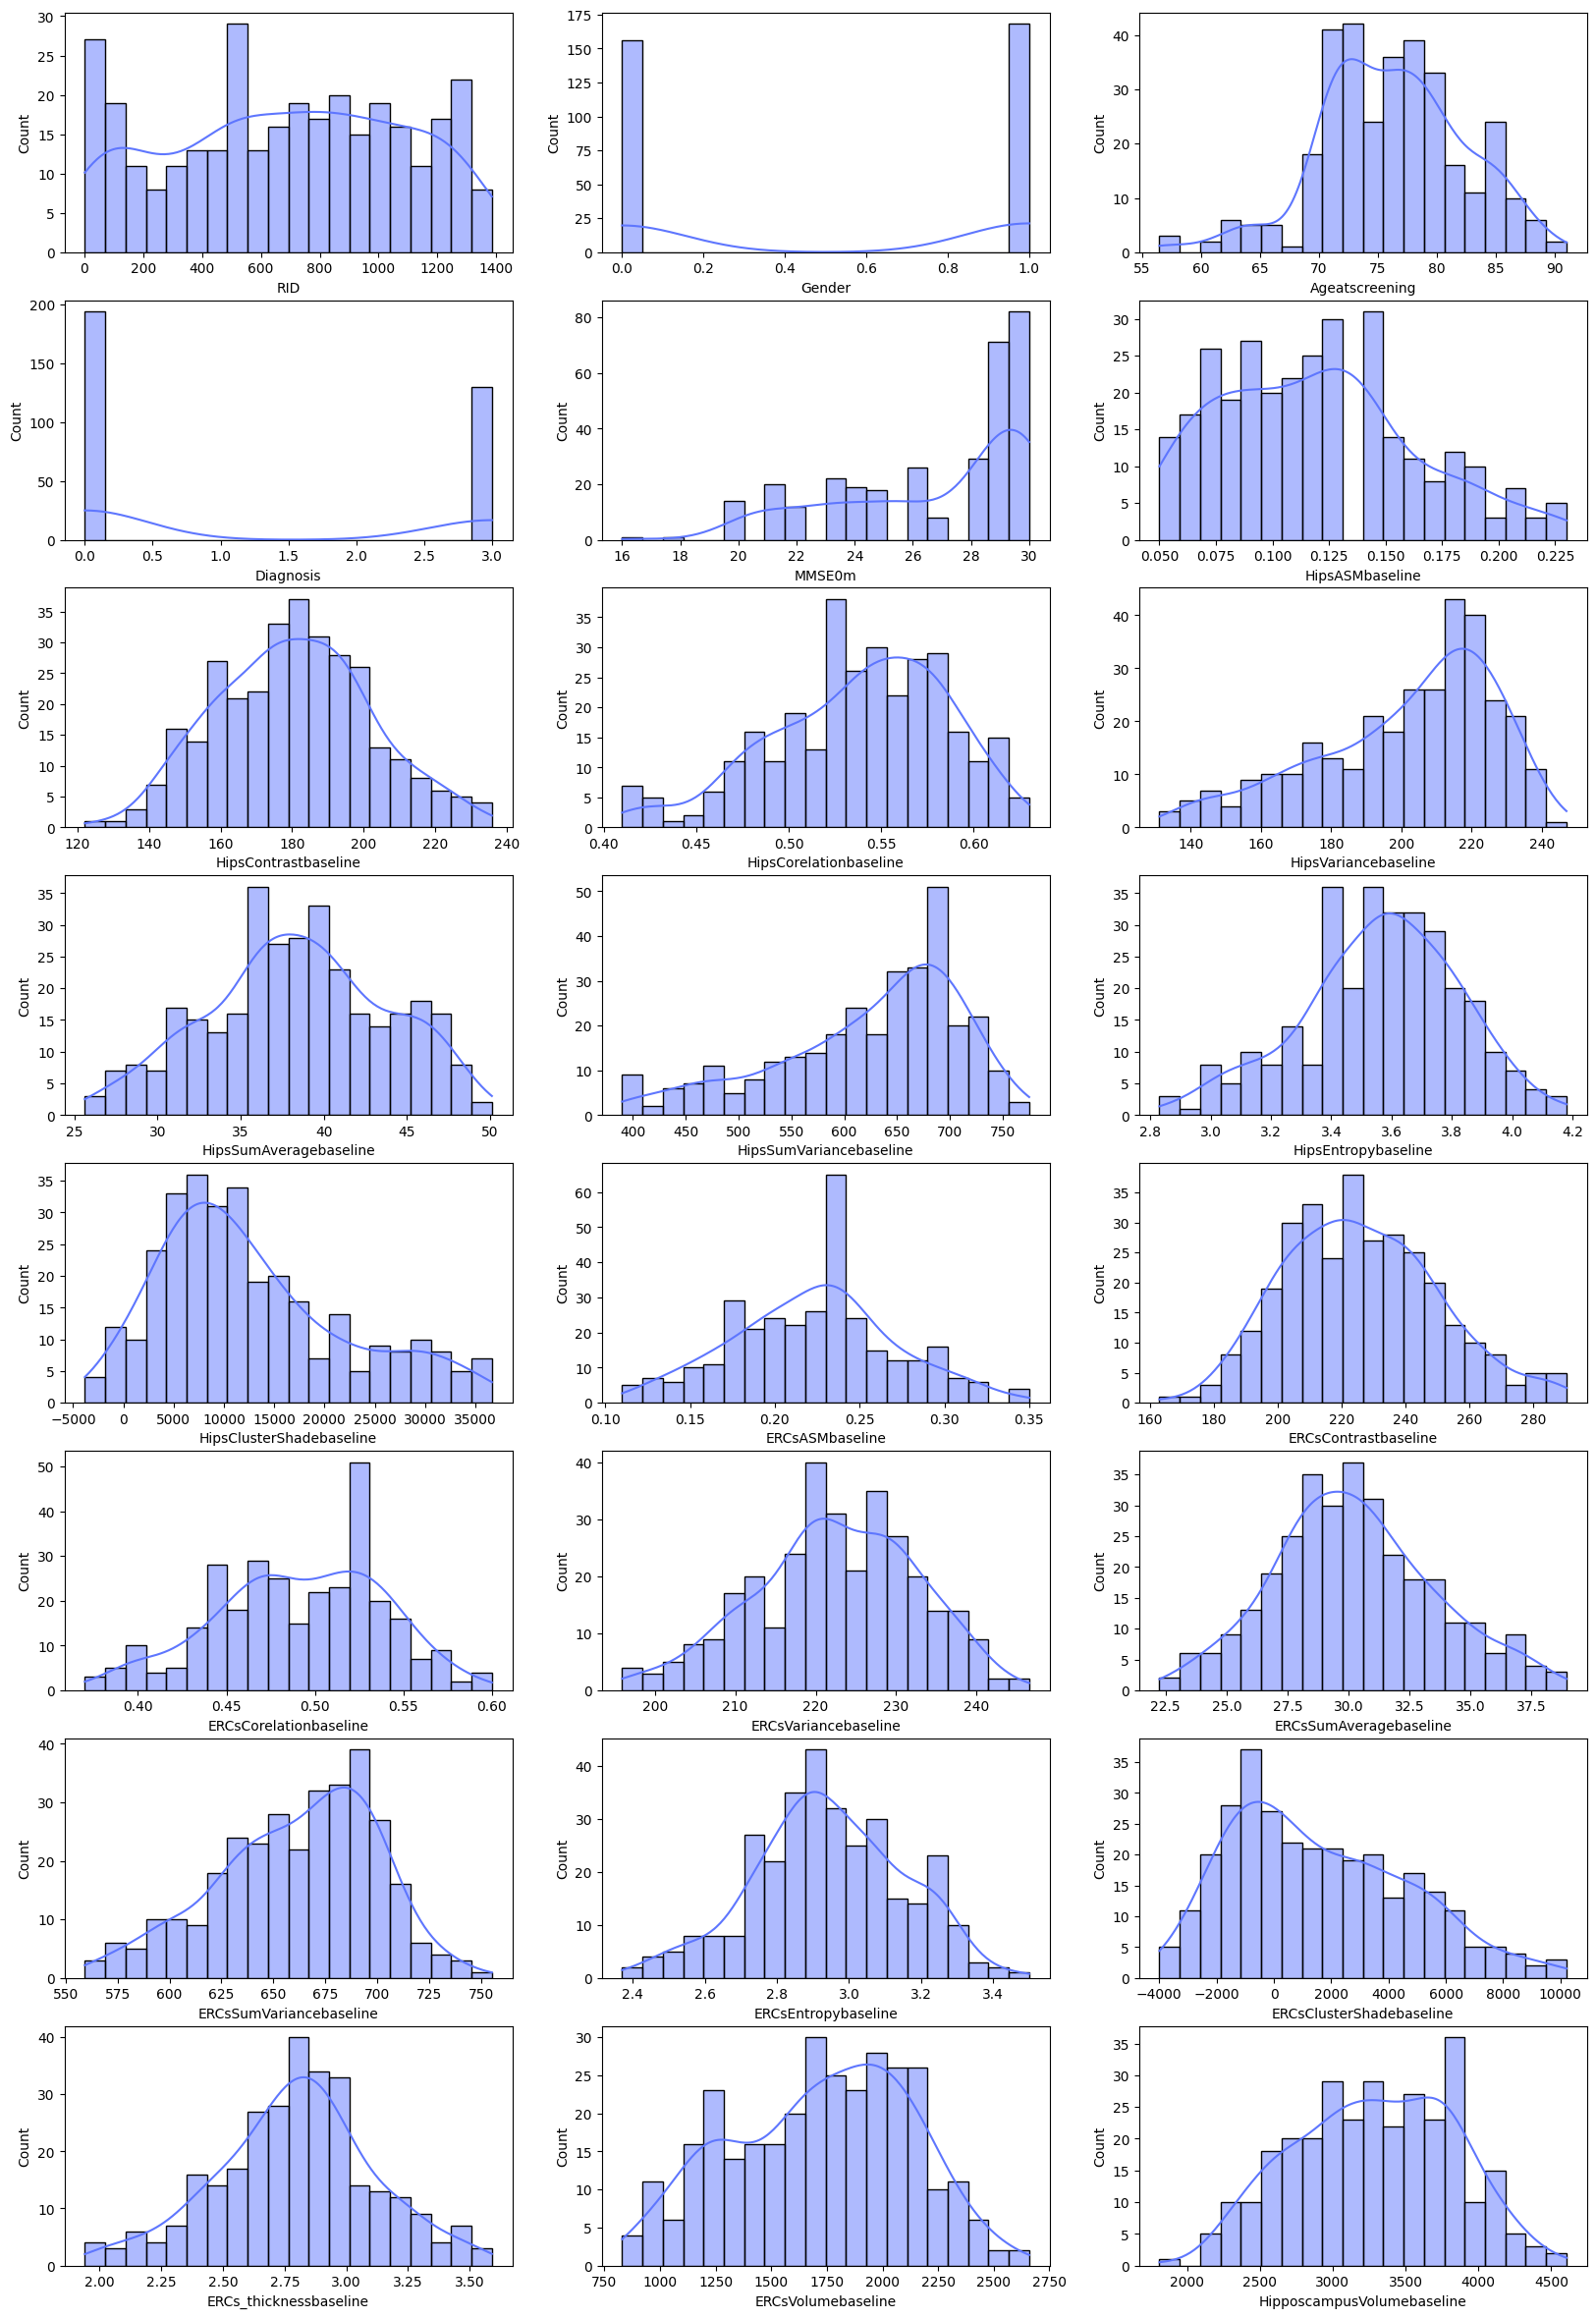

In [7]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(combined_group_one.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(combined_group_one[combined_group_one.columns[i]], 
                 color="#5e76fe", 
                 kde = True,
                 edgecolor = "black",
                 bins=20)

In [8]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in combined_group_one.columns:  
    stat, p = shapiro(combined_group_one[column].dropna())
    skewness = skew(combined_group_one[column].dropna())
    kurt = kurtosis(combined_group_one[column].dropna())
    results[column] = {'p-value': p, 'Normal': p > 0.05, 'Skewness': skewness, 'Kurtosis': kurt} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,p-value,Normal,Skewness,Kurtosis
RID,0.0,False,-0.100342,-1.109298
Gender,0.0,False,-0.074125,-1.994505
Ageatscreening,0.001365,False,-0.240588,0.272893
Diagnosis,0.0,False,0.403002,-1.837589
MMSE0m,0.0,False,-0.766928,-0.647968
HipsASMbaseline,0.000001,False,0.461404,-0.393042
HipsContrastbaseline,0.434616,True,0.100112,-0.343395
HipsCorelationbaseline,0.000005,False,-0.512309,-0.203546
HipsVariancebaseline,0.0,False,-0.766516,-0.2372
HipsSumAveragebaseline,0.00599,False,-0.085811,-0.595399


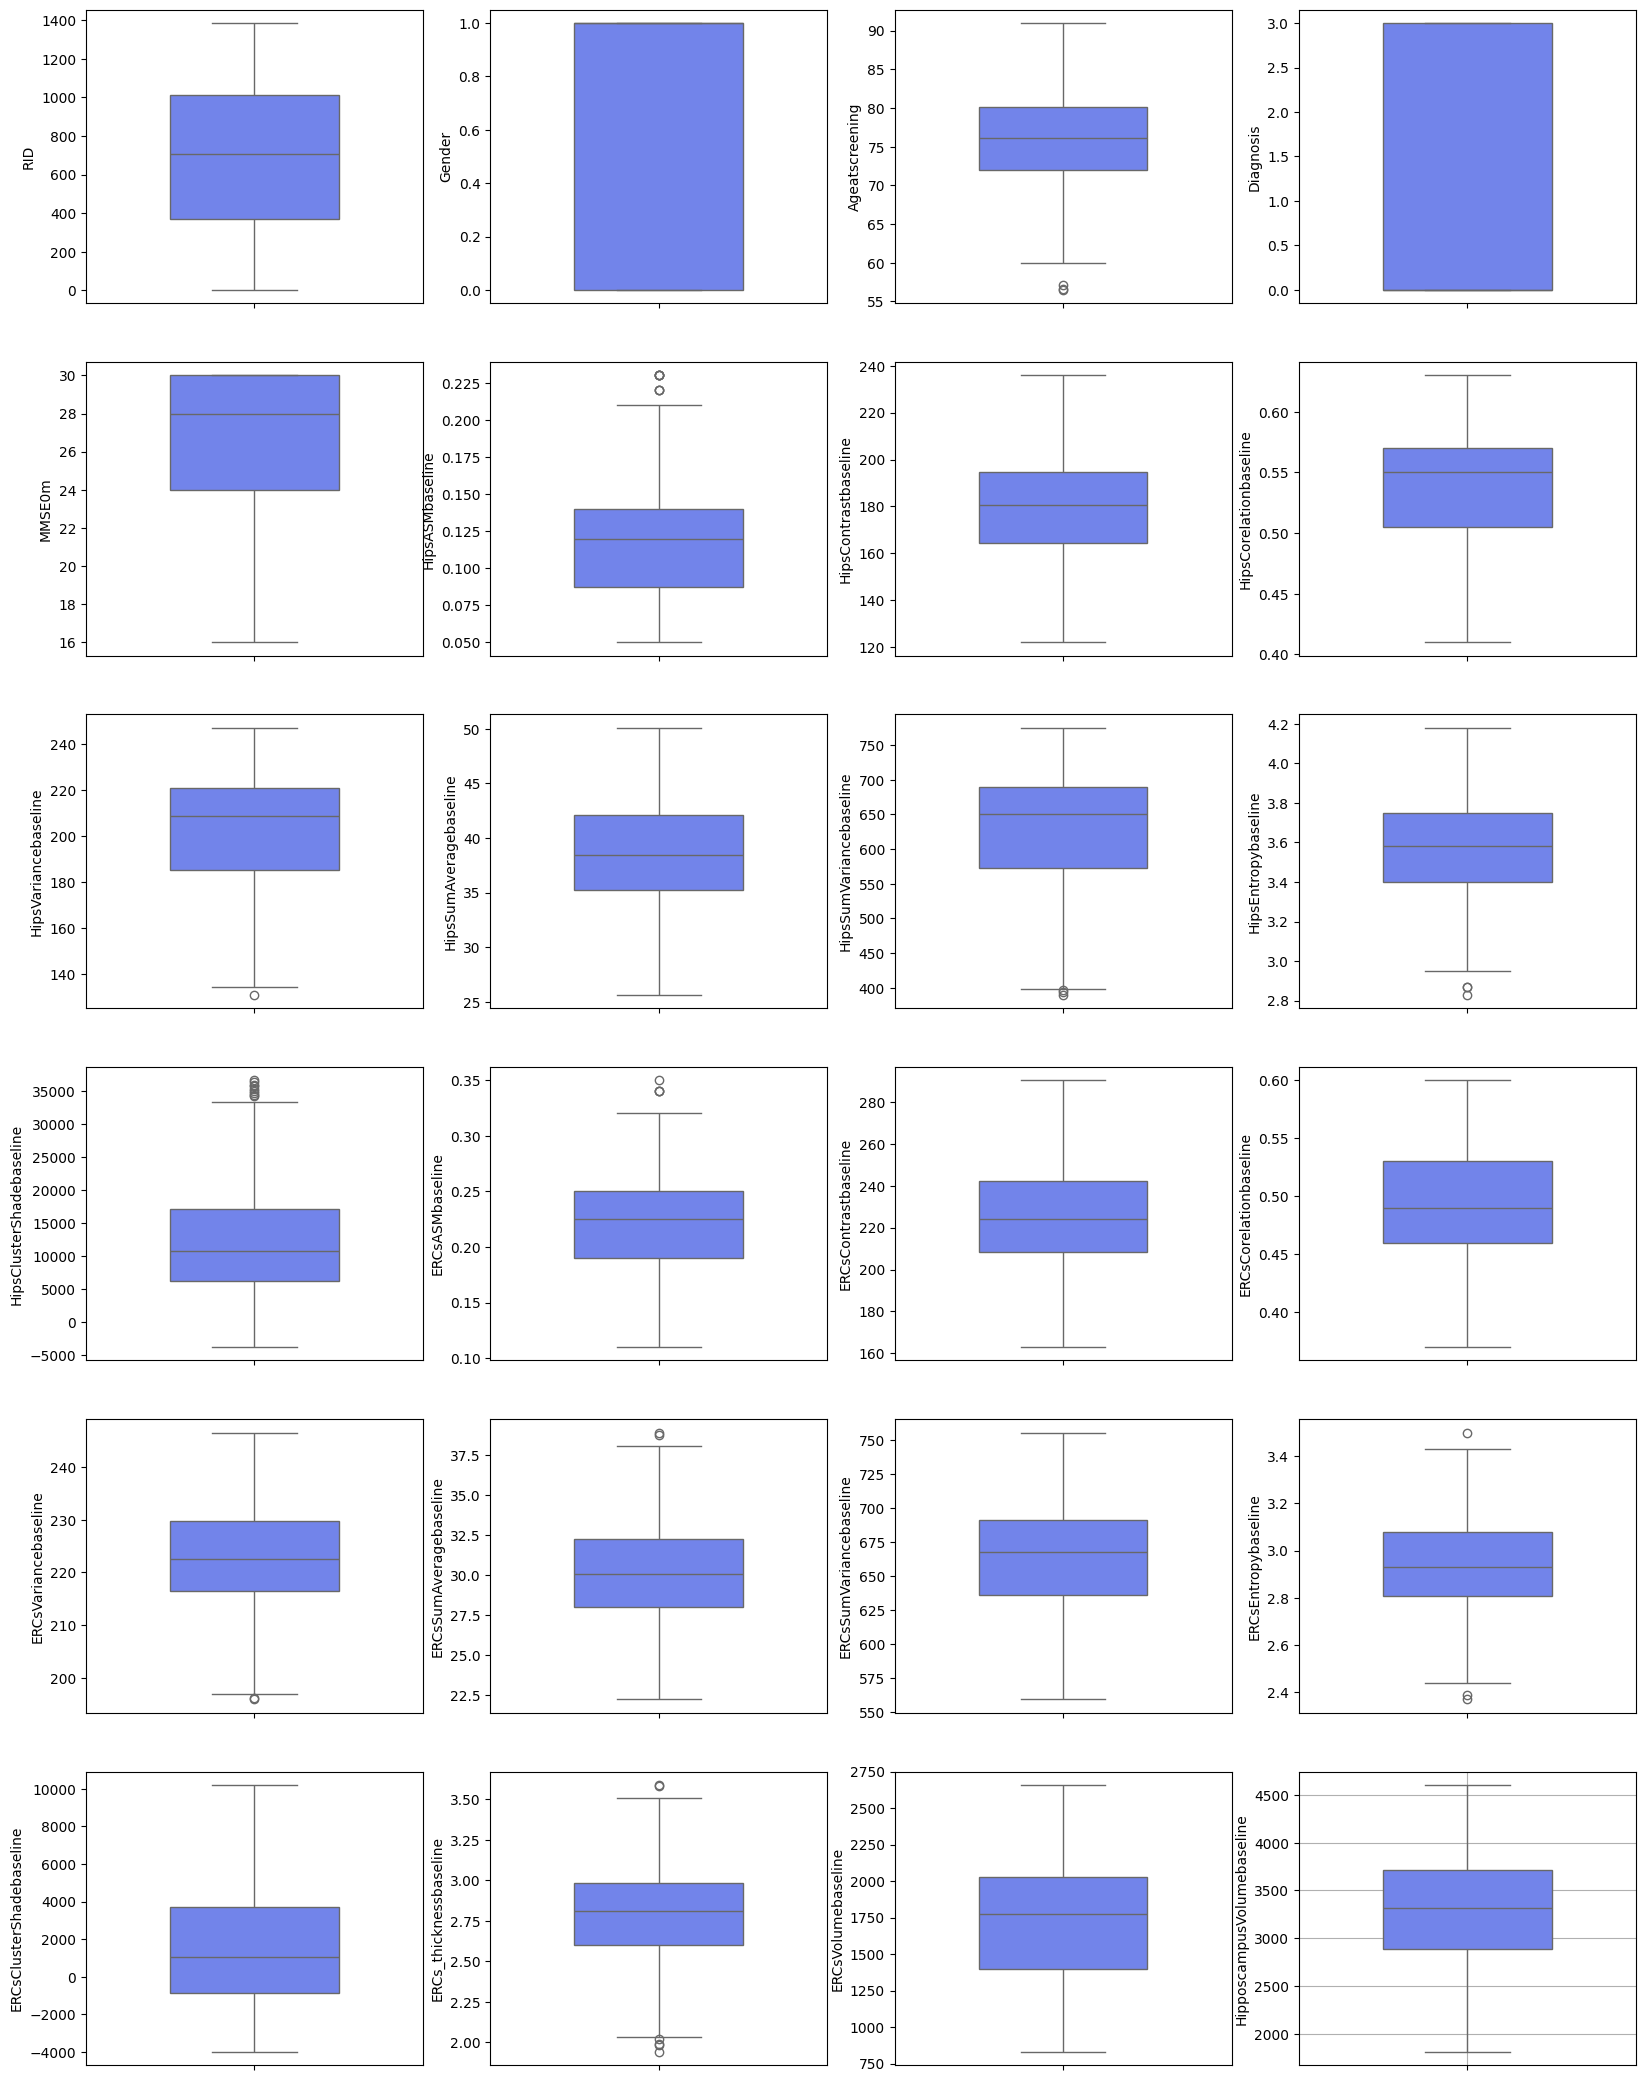

In [9]:
# Plot each column using boxplot
plt.figure(figsize=(20, 45))

for i in range(len(combined_group_one.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(combined_group_one[combined_group_one.columns[i]], 
                color="#5e76fe",
                width=.5)
plt.grid()

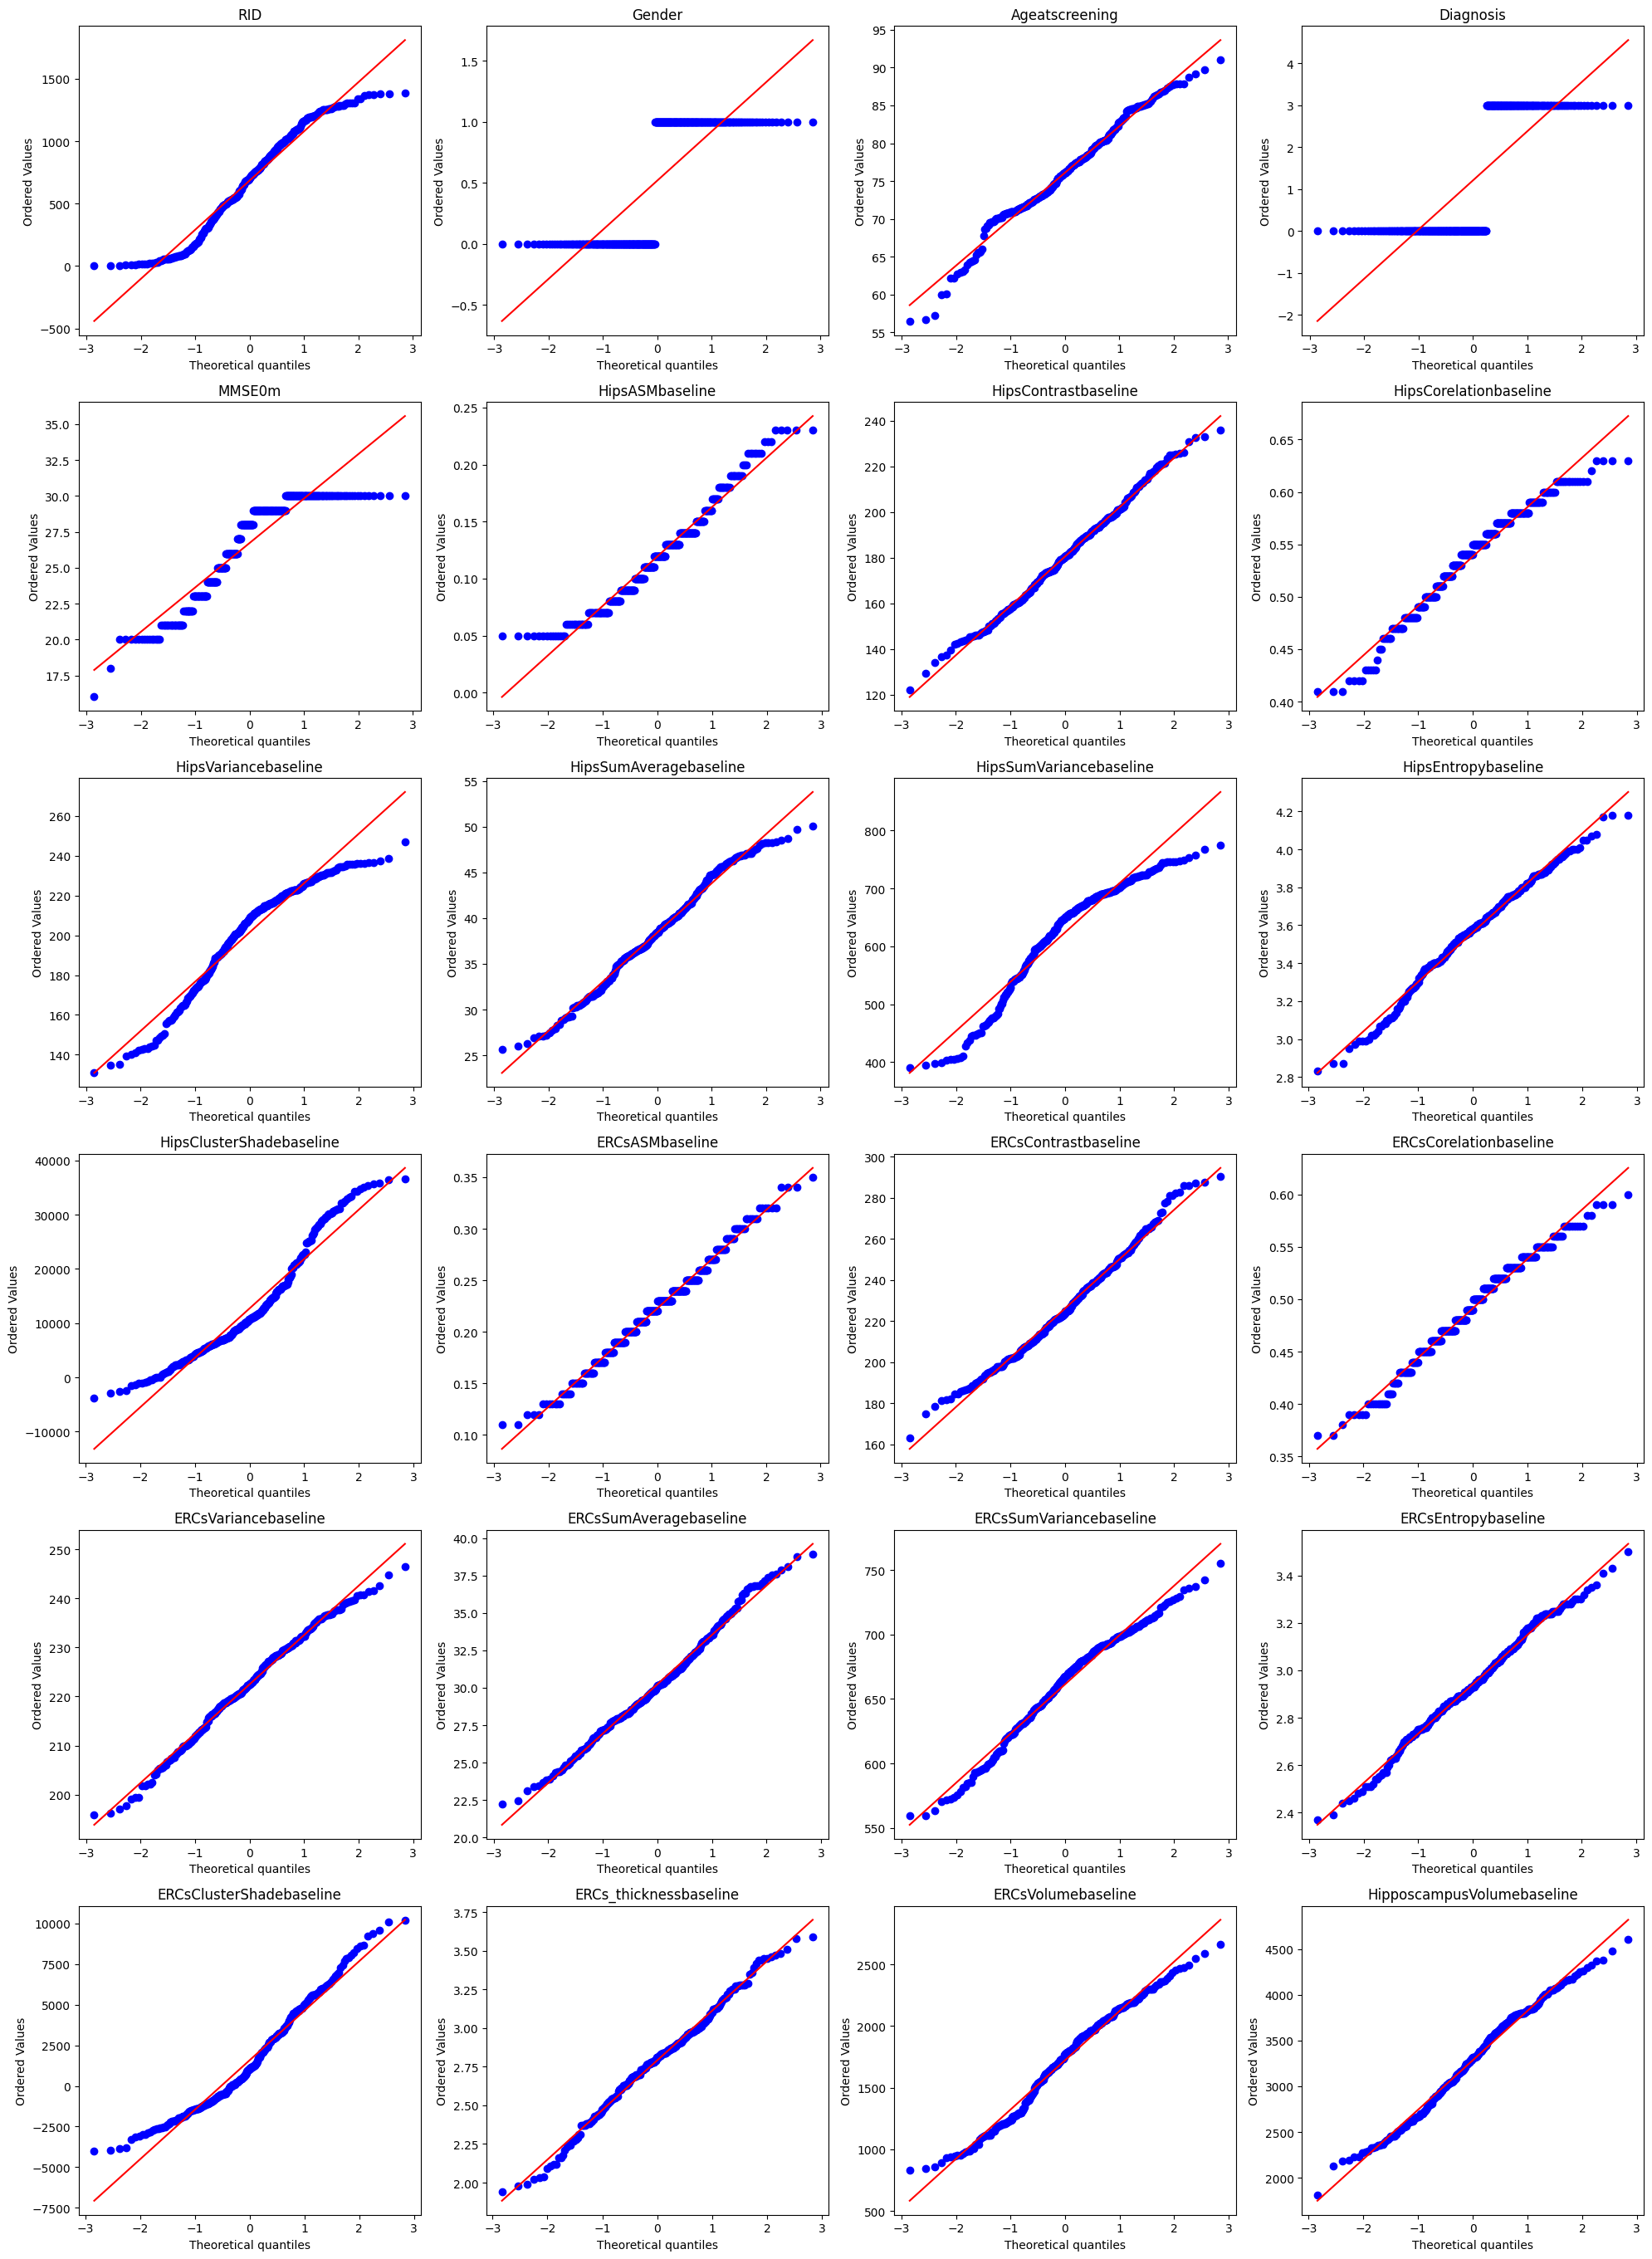

In [10]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(combined_group_one.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(combined_group_one[combined_group_one.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(combined_group_one.columns[i])

plt.tight_layout()

In [21]:
# Create a correlation dataframe
dataset_correlation_group_one = combined_group_one.corr()
dataset_correlation_group_one

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
RID,1.000000,0.103160,-0.003322,0.211519,-0.150572,0.136173,0.113334,0.024285,0.115054,-0.123521,...,0.118864,-0.108616,0.014447,-0.046590,-0.056333,-0.079007,-0.080038,-0.116980,-0.072652,-0.180278
Gender,0.103160,1.000000,-0.001415,0.032673,-0.006031,-0.108370,0.046615,-0.070107,-0.008271,0.100529,...,0.086550,-0.051047,0.062611,-0.053936,-0.039651,-0.088424,-0.104912,-0.090688,-0.228417,-0.278142
Ageatscreening,-0.003322,-0.001415,1.000000,-0.012650,-0.007673,0.162043,0.082506,0.060355,0.119464,-0.186714,...,0.107455,-0.098448,0.066368,-0.030552,-0.047519,-0.061601,-0.052646,-0.173345,-0.144477,-0.222751
Diagnosis,0.211519,0.032673,-0.012650,1.000000,-0.881795,0.151221,0.045200,-0.002527,0.046360,-0.150587,...,0.494057,-0.535708,-0.009840,-0.216219,-0.353713,-0.324823,-0.075632,-0.486577,-0.629677,-0.585595
MMSE0m,-0.150572,-0.006031,-0.007673,-0.881795,1.000000,-0.192628,-0.045179,0.012547,-0.030354,0.180116,...,-0.460785,0.526292,0.030823,0.221823,0.362605,0.322567,0.064810,0.502382,0.647487,0.514594
HipsASMbaseline,0.136173,-0.108370,0.162043,0.151221,-0.192628,1.000000,0.440410,0.313188,0.688873,-0.914220,...,0.096531,-0.057965,0.075725,-0.310254,0.029784,-0.296549,-0.277805,-0.046863,-0.110459,-0.168786
HipsContrastbaseline,0.113334,0.046615,0.082506,0.045200,-0.045179,0.440410,1.000000,-0.174220,0.620015,-0.378503,...,0.056892,0.071886,0.261958,-0.147627,0.216923,-0.184847,-0.193061,0.106655,-0.052779,-0.163405
HipsCorelationbaseline,0.024285,-0.070107,0.060355,-0.002527,0.012547,0.313188,-0.174220,1.000000,0.475273,-0.378093,...,-0.112936,0.145320,-0.031517,-0.414736,0.076541,-0.317041,-0.387168,-0.140780,0.022114,0.077684
HipsVariancebaseline,0.115054,-0.008271,0.119464,0.046360,-0.030354,0.688873,0.620015,0.475273,1.000000,-0.672029,...,0.055758,0.096639,0.256379,-0.427598,0.260734,-0.389976,-0.497799,0.028251,-0.016659,-0.112117
HipsSumAveragebaseline,-0.123521,0.100529,-0.186714,-0.150587,0.180116,-0.914220,-0.378503,-0.378093,-0.672029,1.000000,...,-0.030047,0.035485,0.033674,0.454720,0.050495,0.403557,0.388546,0.034428,0.097888,0.154170


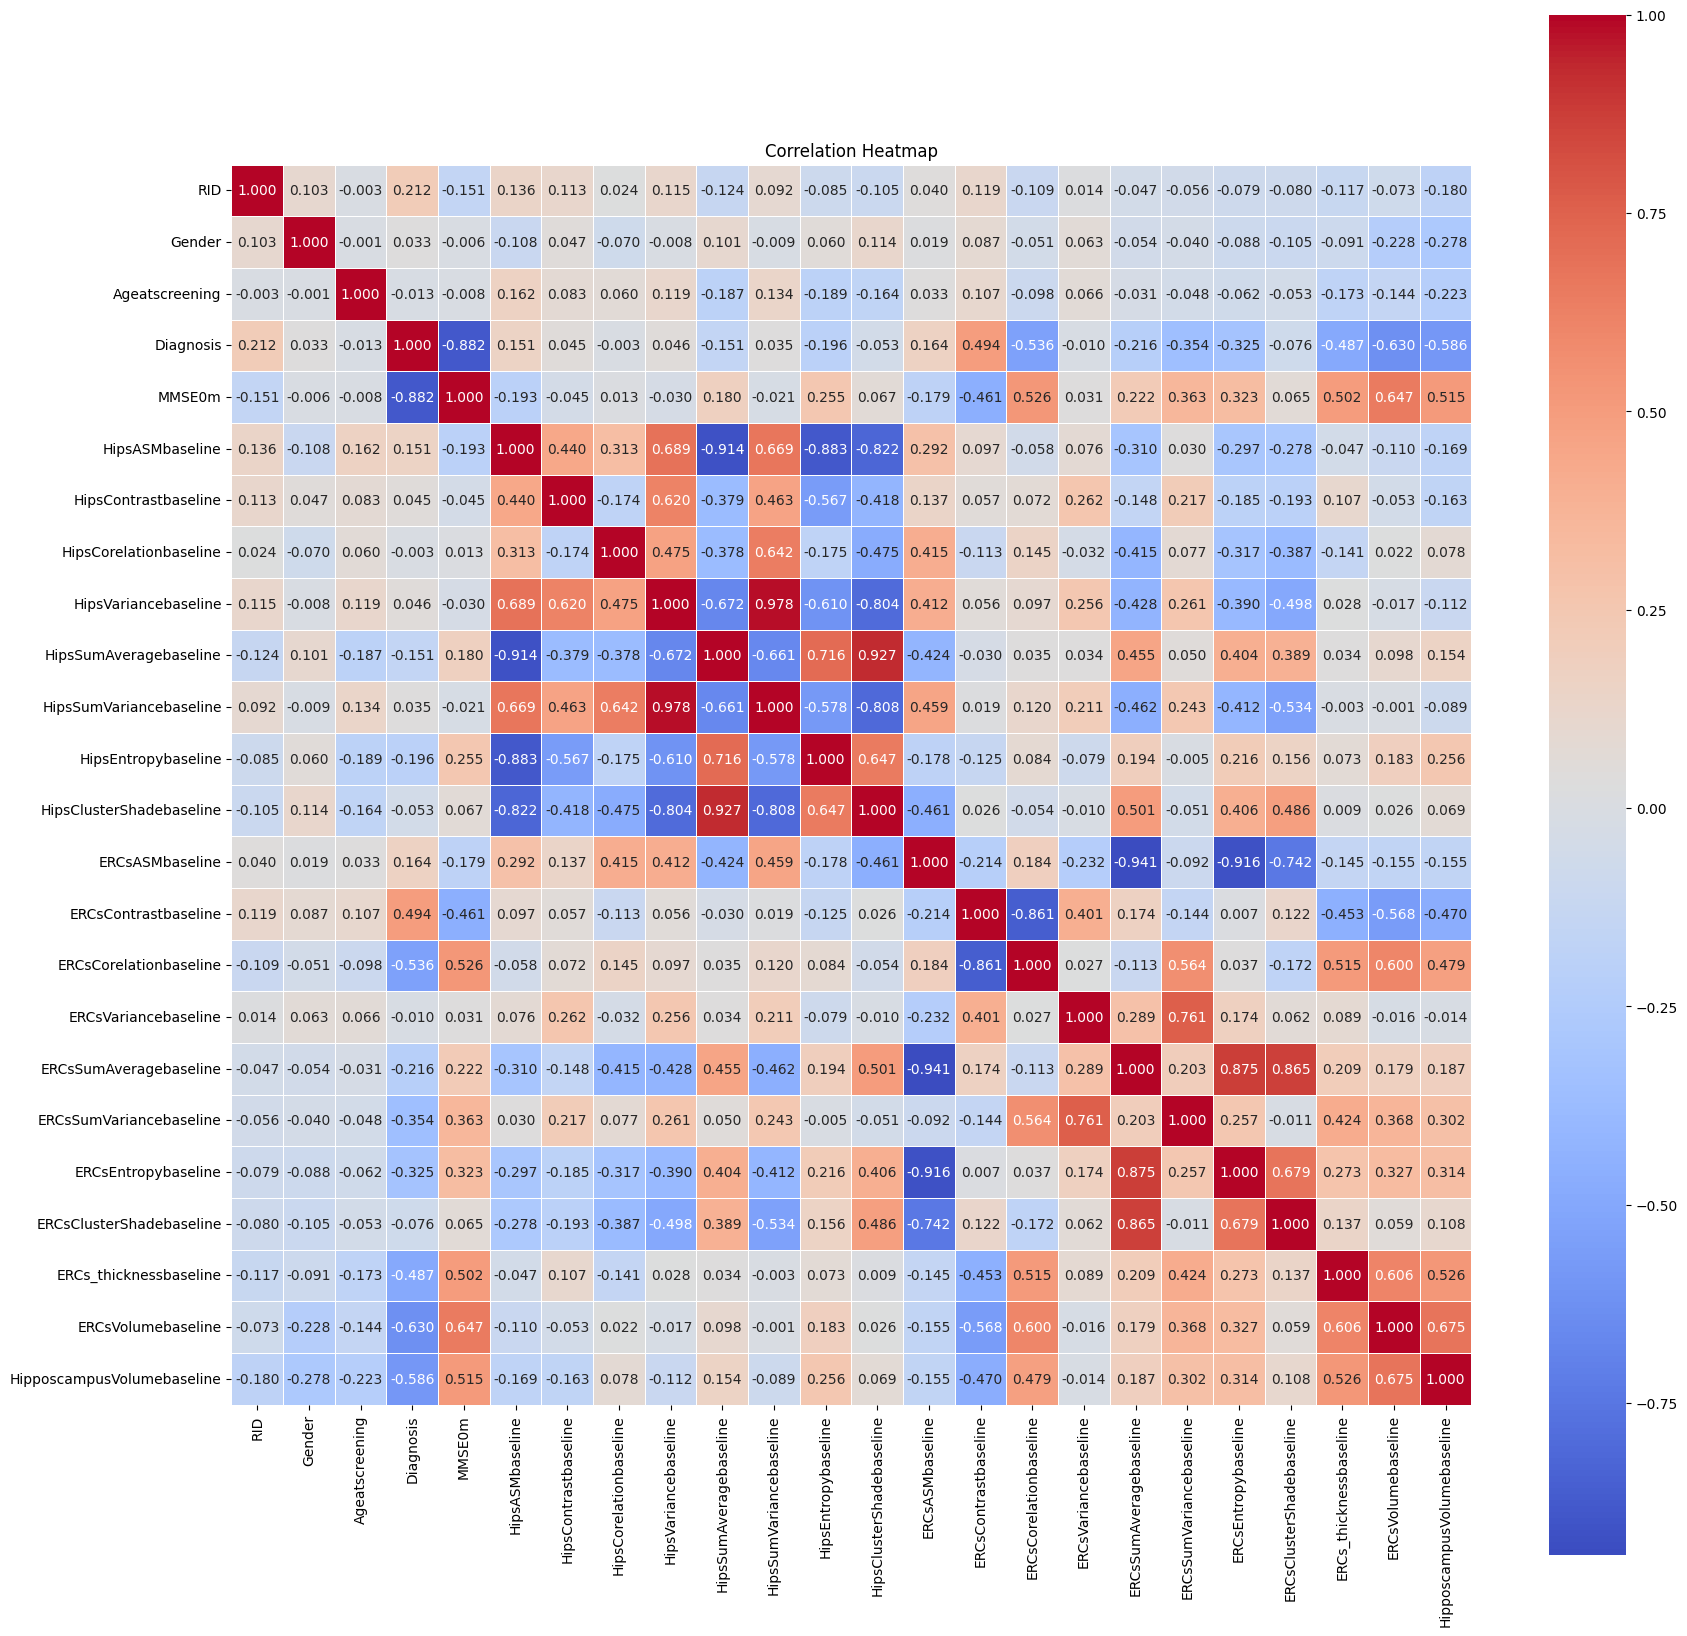

In [23]:
combined_group_one

# Plot a heatmap
plt.figure(figsize=(20, 20))  

sns.heatmap(dataset_correlation_group_one, 
            annot = True, 
            fmt = ".3f", 
            cmap = "coolwarm",
            square = True,
            linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

### Group two seperation

In [12]:
# Group two
group_three = dataset[dataset["Diagnosis"] == 0]
group_four = dataset[dataset["Diagnosis"] == 2]

combined_groups_two = pd.concat([group_three, group_four], ignore_index = True)
combined_groups_two["Diagnosis"].unique()

array([0, 2])

In [13]:
combined_groups_two

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
1,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
2,14,1,78.6137,0,29.0,0.12,188.33,0.49,183.76,39.63,...,241.64,0.44,226.48,35.11,664.29,3.10,8478.33,3.01,1809.0,3292.0
3,15,0,80.9068,0,29.0,0.10,161.28,0.54,174.53,35.94,...,221.76,0.45,NaN,30.57,NaN,3.12,4287.78,2.90,2188.0,3603.0
4,16,0,65.5205,0,28.0,0.12,166.97,0.58,202.96,38.42,...,228.53,0.50,228.72,28.98,686.36,2.90,-1381.99,2.73,1829.0,3695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,549,0,68.8849,2,25.0,0.11,169.76,0.58,205.91,38.90,...,219.32,0.53,229.07,30.38,696.95,3.05,1.54,3.53,2140.0,3801.0
274,658,0,72.2822,2,30.0,0.13,187.66,0.57,222.54,37.58,...,206.16,0.55,227.90,30.10,705.46,3.03,281.47,NaN,2750.0,3345.0
275,1244,0,79.0877,2,24.0,0.13,152.52,0.63,208.54,35.72,...,220.67,0.53,231.71,30.18,706.18,3.02,28.95,2.98,2016.0,3532.0
276,1311,0,69.2110,2,29.0,0.10,175.27,0.50,187.40,44.04,...,222.69,0.52,229.54,32.03,695.47,3.05,2811.38,2.98,1605.0,3219.0


In [14]:
combined_groups_two["Diagnosis"].value_counts()

y_split_two = combined_groups_two["Diagnosis"]
y_split_two.value_counts()

Diagnosis
0    194
2     84
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

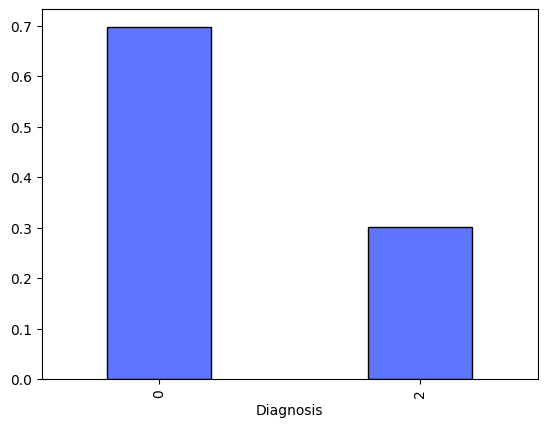

In [15]:
y_split_two.value_counts(normalize=True).plot(kind="bar",
                                                color = "#5e76fe",
                                                width = 0.4,
                                                edgecolor = "black",)

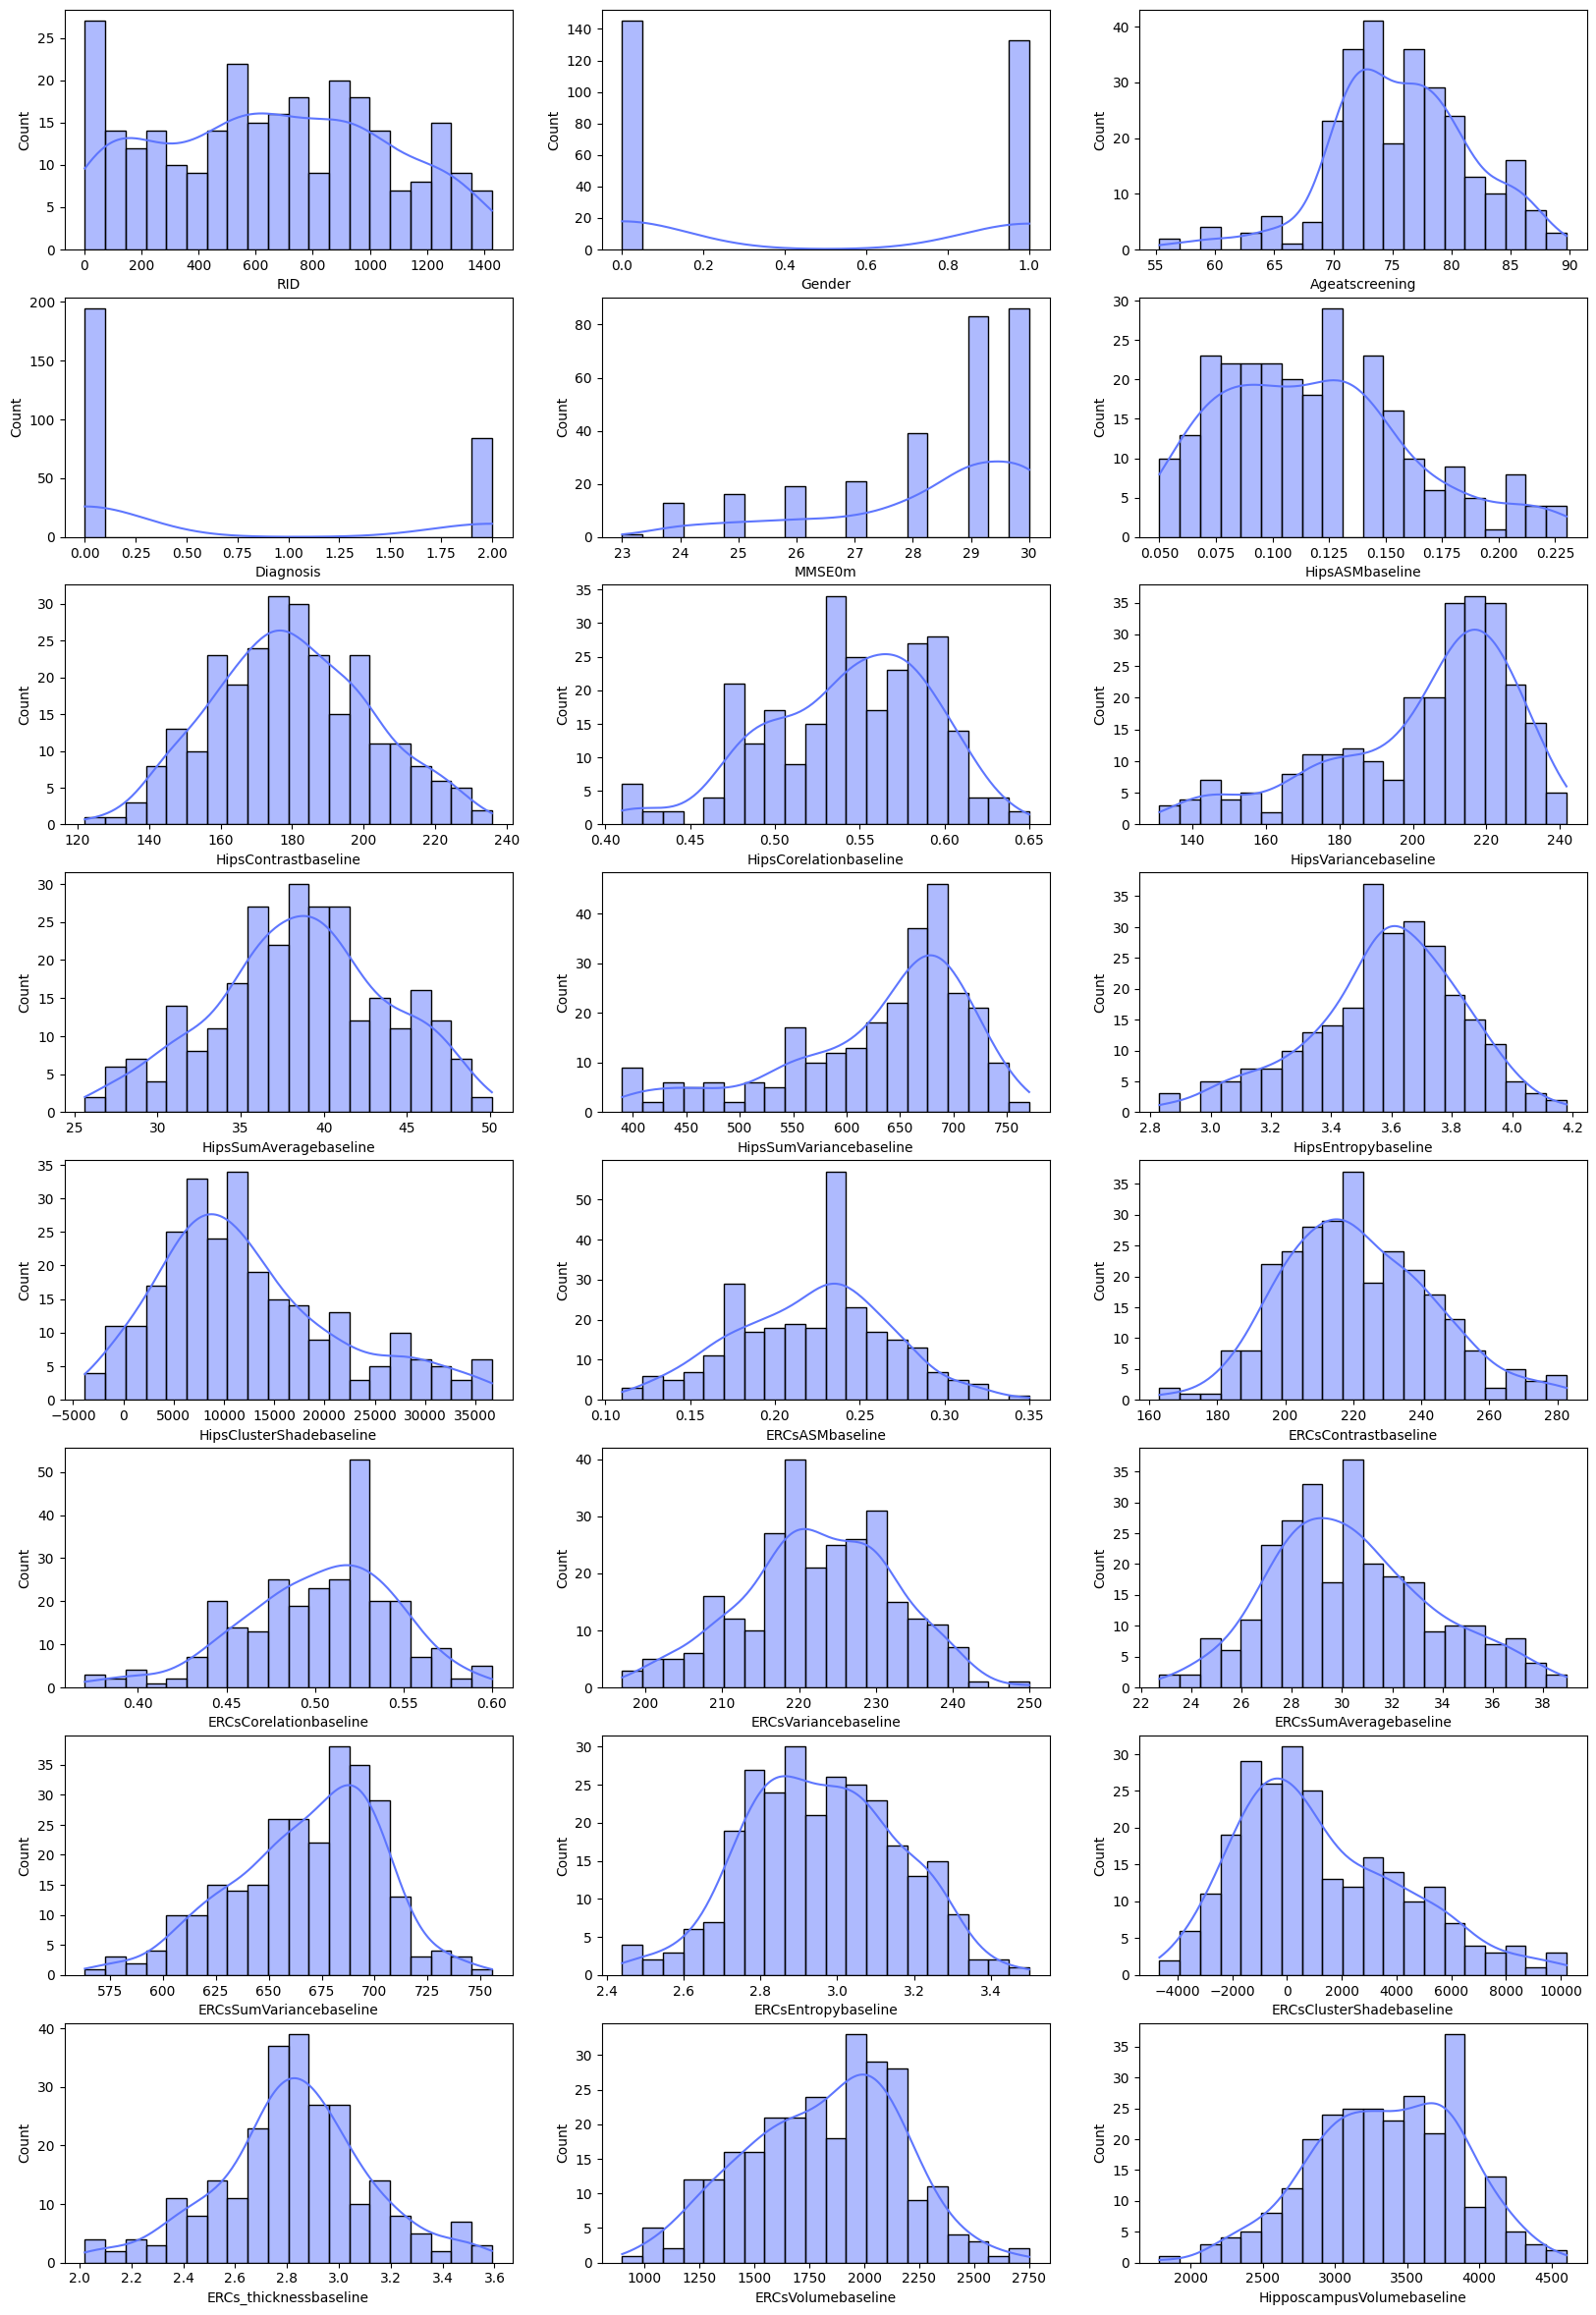

In [16]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(combined_groups_two.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(combined_groups_two[combined_groups_two.columns[i]], 
                 color="#5e76fe", 
                 kde = True,
                 edgecolor = "black",
                 bins=20)

In [17]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in combined_groups_two.columns:  
    stat, p = shapiro(combined_groups_two[column].dropna())
    skewness = skew(combined_groups_two[column].dropna())
    kurt = kurtosis(combined_groups_two[column].dropna())
    results[column] = {'p-value': p, 'Normal': p > 0.05, 'Skewness': skewness, 'Kurtosis': kurt} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,p-value,Normal,Skewness,Kurtosis
RID,0.000001,False,0.050421,-1.056961
Gender,0.0,False,0.086411,-1.992533
Ageatscreening,0.00096,False,-0.27101,0.55903
Diagnosis,0.0,False,0.861692,-1.257486
MMSE0m,0.0,False,-1.073925,0.163946
HipsASMbaseline,0.000001,False,0.565122,-0.208347
HipsContrastbaseline,0.327825,True,0.123537,-0.405432
HipsCorelationbaseline,0.000076,False,-0.482988,-0.15306
HipsVariancebaseline,0.0,False,-0.96461,0.144421
HipsSumAveragebaseline,0.05103,True,-0.134364,-0.42979


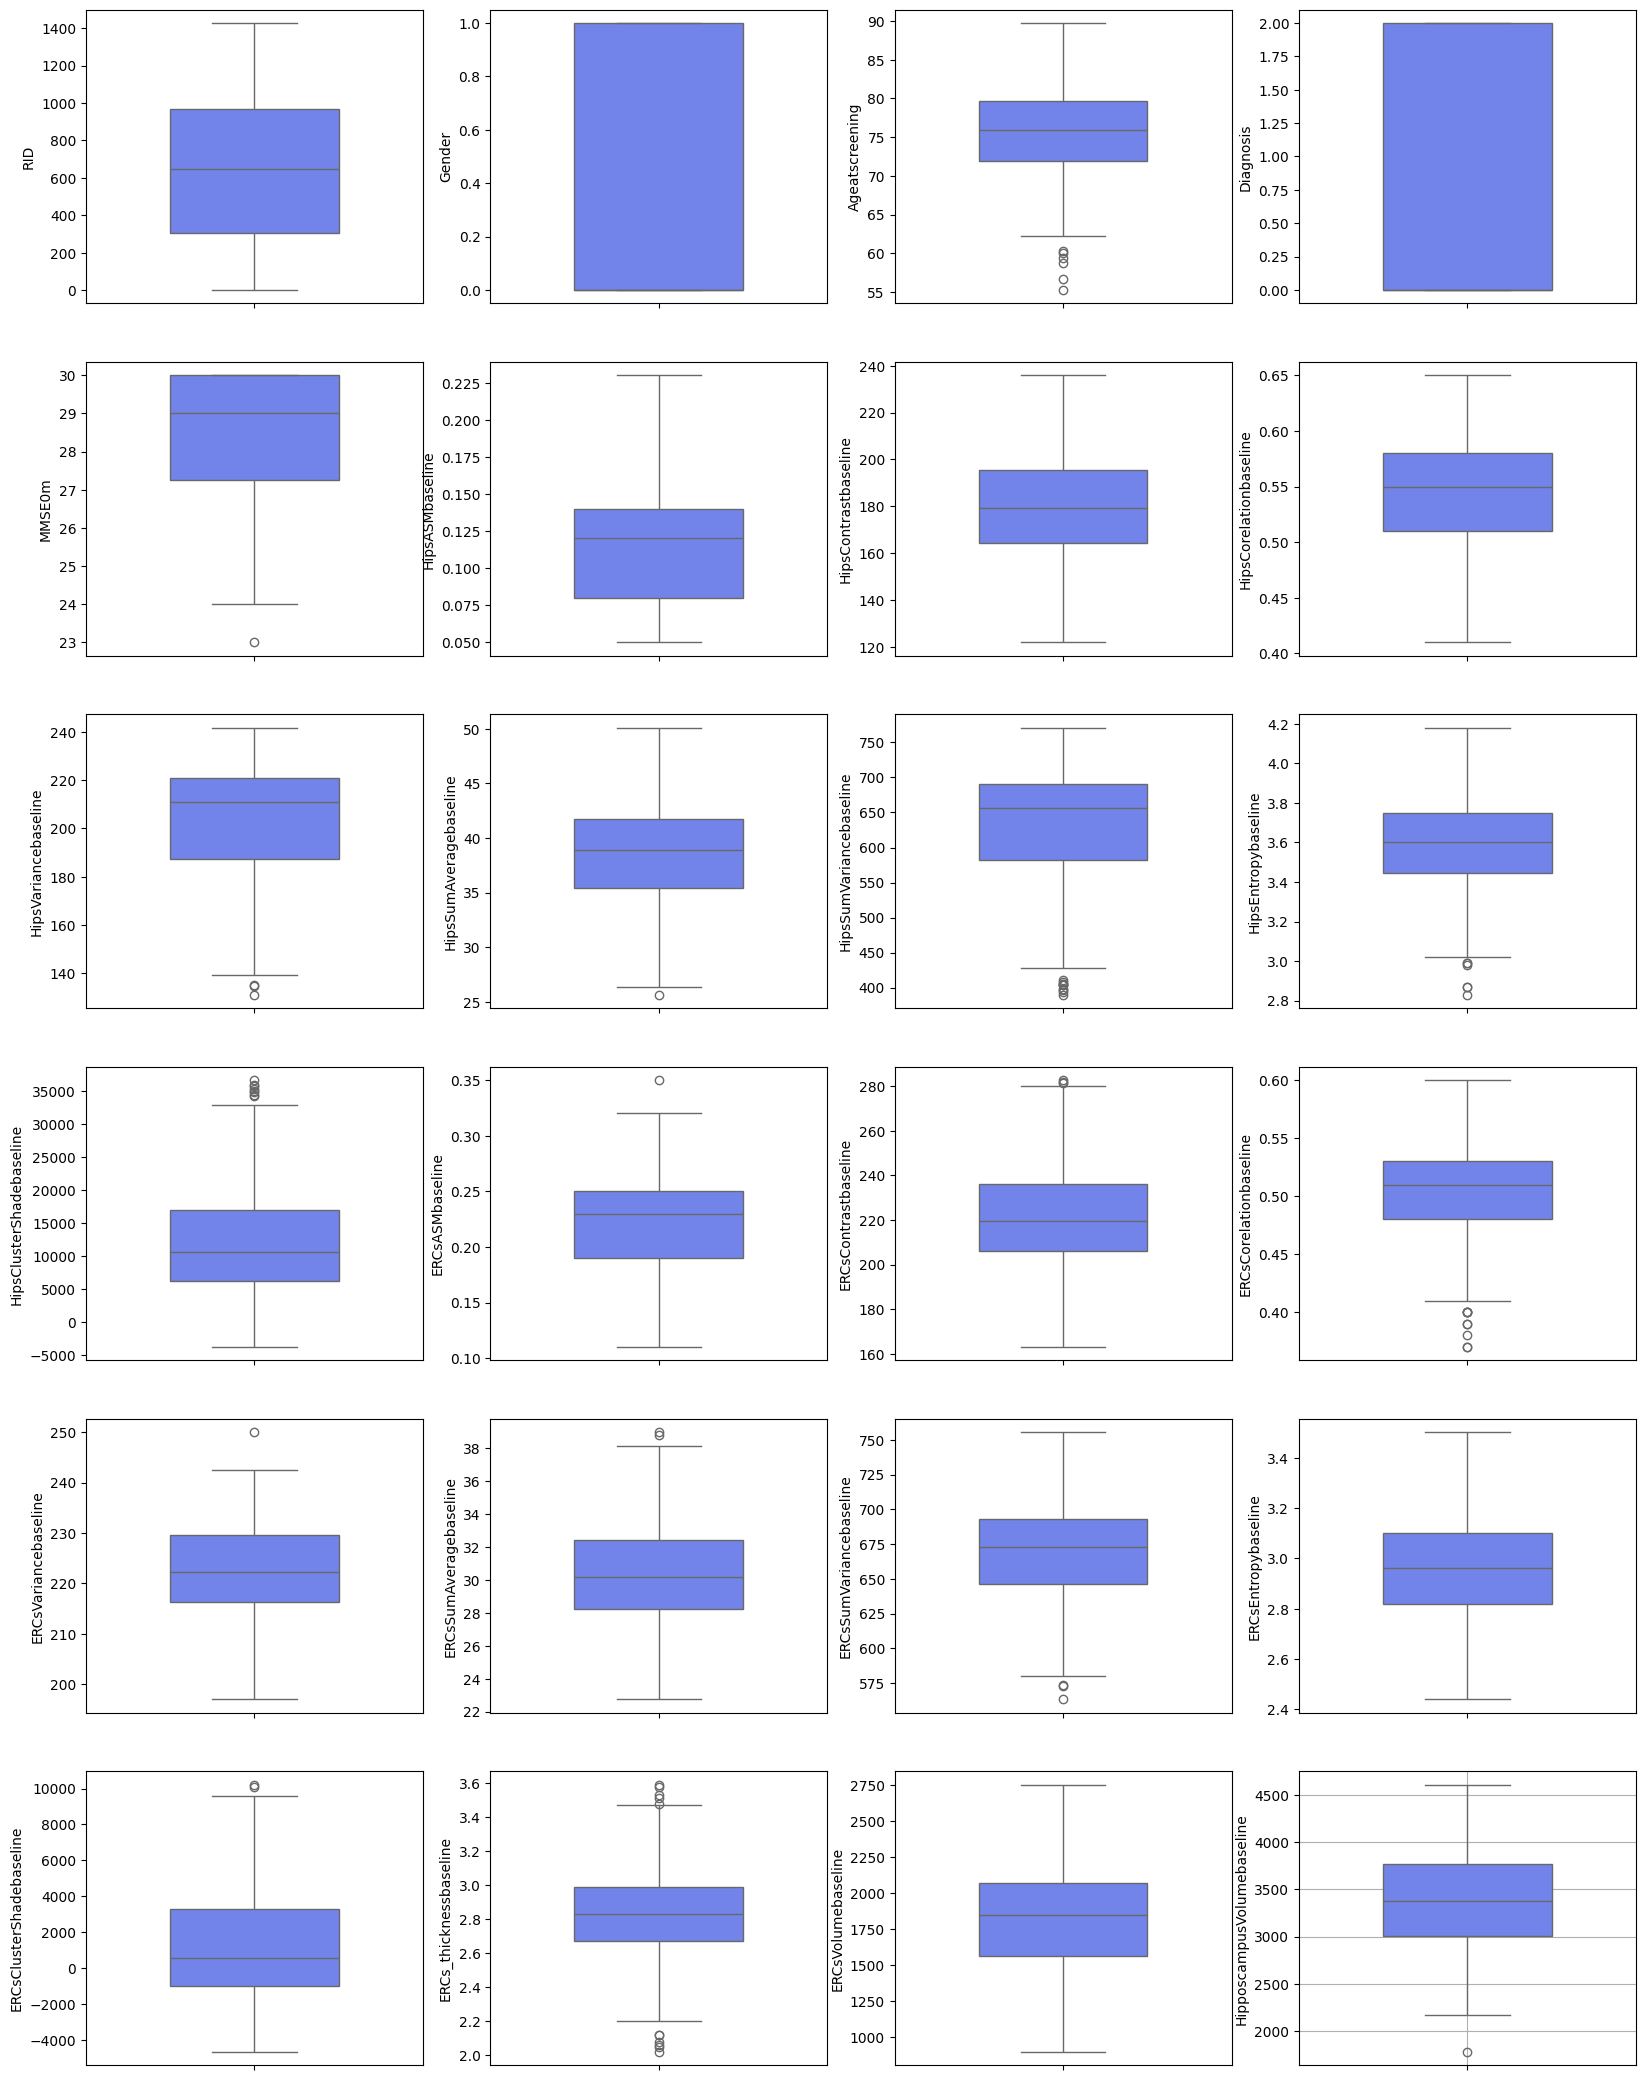

In [18]:
# Plot each column using boxplot
plt.figure(figsize=(20, 45))

for i in range(len(combined_groups_two.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(combined_groups_two[combined_groups_two.columns[i]], 
                color="#5e76fe",
                width=.5)
plt.grid()

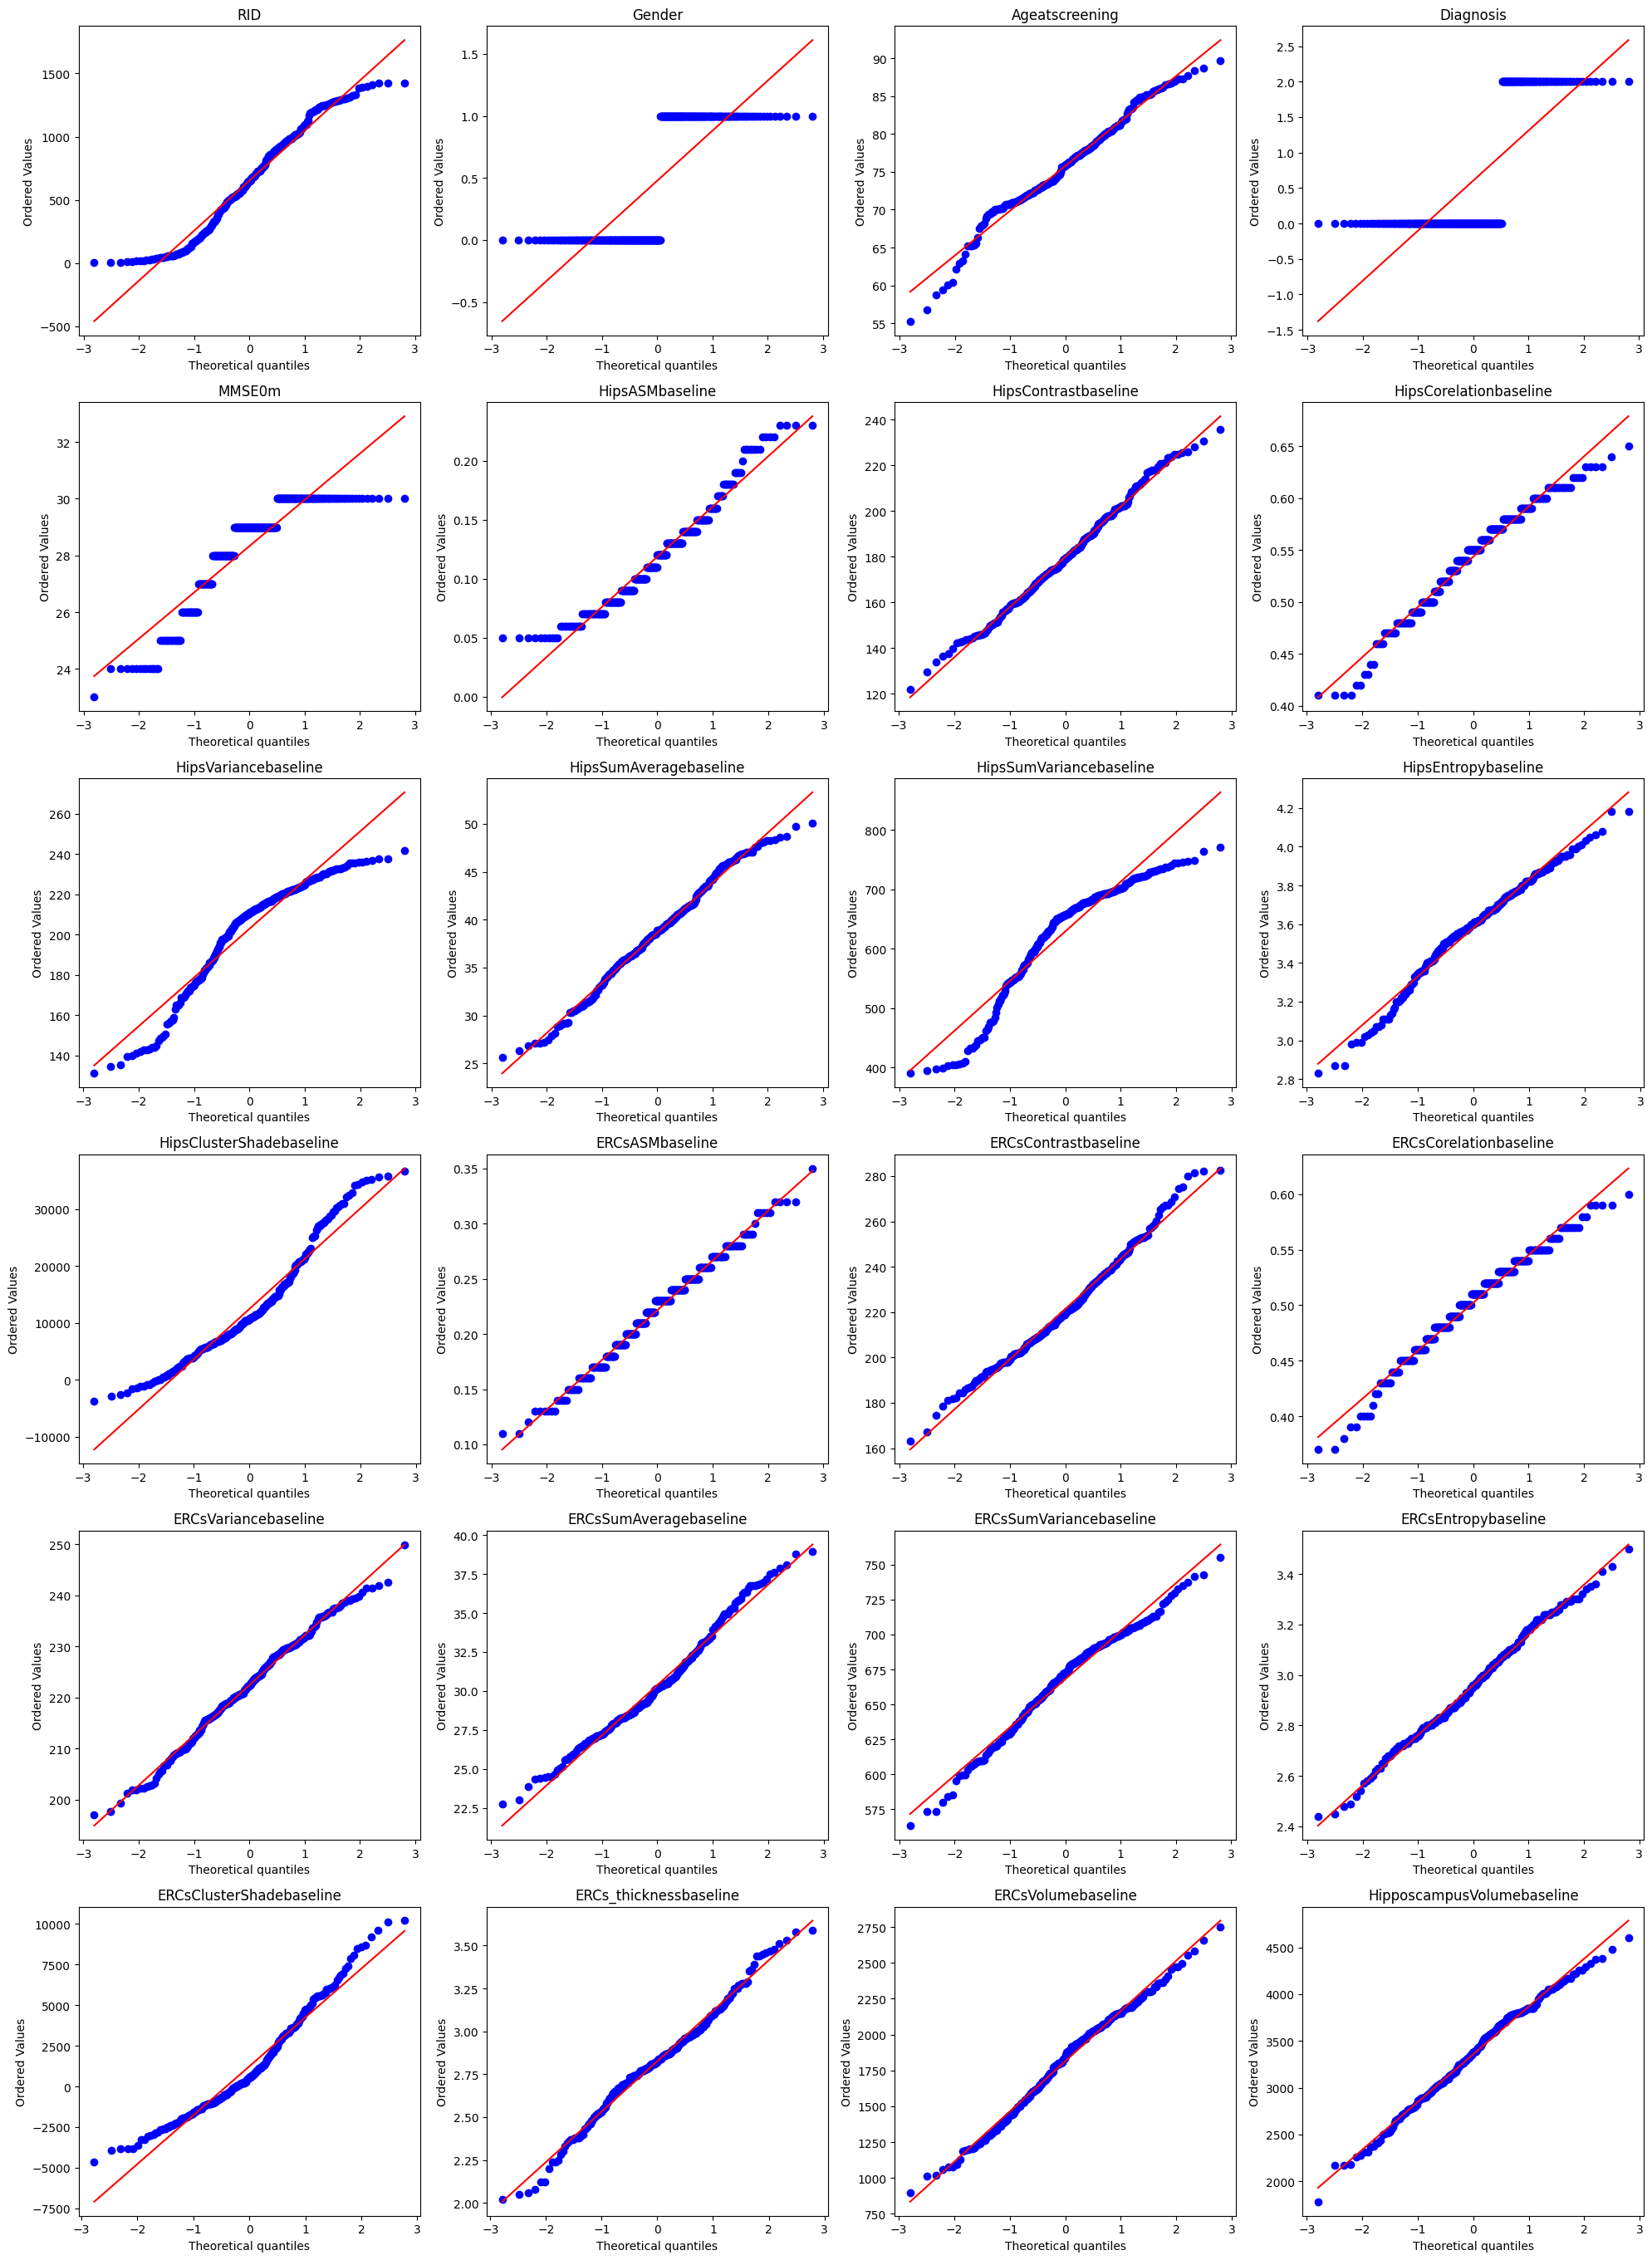

In [19]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(combined_groups_two.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(combined_groups_two[combined_groups_two.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(combined_groups_two.columns[i])

plt.tight_layout()